Automobile SALE EDA

In [74]:
#library to get import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [209]:
df = pd.read_csv('Auto Sales data.csv')
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018                   828   Shipped  Motorcycles    95   
1     07/05/2018                   757   Shipped  Motorcycles    95   
2     01/07/2018                   703   Shipped  Motorcycles    95   
3     25/08/2018                   649   Shipped  Motorcycles    95   
4     28/10/2018                   586   Shipped  Motorcycles    95   
...          ...                   ...       ...          ...   ...   
2742  02/12/2019                  2924   Shipped        Ships    54   
2743  31/01/2020                  2865   Shipped        Ships    54   
2744  01/03/2020                  2836  Resolved        Ships    54   
2745  28/03/2020                  2810   Shipped        Ships    54   
2746  06/05/2020                  2772   On Hold        Ships    54   

     PRODUCTCODE             CUSTOMERNAME             PHONE  \
0       S10_1678        Land of Toys Inc.        2125557818   
1       S10_1678       Reims Collectables        26.47.1555   
2       S10_1678          Lyon Souveniers  +33 1 46 62 7555   
3       S10_1678        Toys4GrownUps.com        6265557265   
4       S10_1678     Technics Stores Inc.        6505556809   
...          ...                      ...               ...   
2742    S72_3212    Euro Shopping Channel    (91) 555 94 44   
2743    S72_3212  Oulu Toy Supplies, Inc.        981-443655   
2744    S72_3212    Euro Shopping Channel    (91) 555 94 44   
2745    S72_3212             Alpha Cognac        61.77.6555   
2746    S72_3212        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0                 Yu             Kwai    Small  
1            Henriot             Paul    Small  
2           Da Cunha           Daniel   Medium  
3              Young            Julie   Medium  
4             Hirano             Juri   Medium  
...              ...              ...      ...  
2742          Freyre            Diego    Small  
2743       Koskitalo           Pirkko   Medium  
2744          Freyre            Diego   Medium  
2745          Roulet          Annette    Small  
2746         Yoshido             Juri   Medium  

[2747 rows x 20 columns]

In the data, days Since order is taken as 2022-06-07 for the difference, 
we will be removing it & creating new Days difference baseline as 02-06-2020 (1st June 2020)

In [149]:
df.shape 

(2747, 20)

In [151]:
# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)


In [163]:
#new column with baseline difference from (1,6,2020)
from datetime import datetime
# Assuming df['ORDERDATE'] is a string representing a date
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])  # Convert 'ORDERDATE' to datetime
temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date - df['ORDERDATE']).dt.days

In [165]:
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0    2018-02-24   Shipped  Motorcycles    95    S10_1678   
1    2018-05-07   Shipped  Motorcycles    95    S10_1678   
2    2018-07-01   Shipped  Motorcycles    95    S10_1678   
3    2018-08-25   Shipped  Motorcycles    95    S10_1678   
4    2018-10-28   Shipped  Motorcycles    95    S10_1678   
...         ...       ...          ...   ...         ...   
2742 2019-12-02   Shipped        Ships    54    S72_3212   
2743 2020-01-31   Shipped        Ships    54    S72_3212   
2744 2020-03-01  Resolved        Ships    54    S72_3212   
2745 2020-03-28   Shipped        Ships    54    S72_3212   
2746 2020-05-06   On Hold        Ships    54    S72_3212   

                 CUSTOMERNAME             PHONE  \
0           Land of Toys Inc.        2125557818   
1          Reims Collectables        26.47.1555   
2             Lyon Souveniers  +33 1 46 62 7555   
3           Toys4GrownUps.com        6265557265   
4        Technics Stores Inc.        6505556809   
...                       ...               ...   
2742    Euro Shopping Channel    (91) 555 94 44   
2743  Oulu Toy Supplies, Inc.        981-443655   
2744    Euro Shopping Channel    (91) 555 94 44   
2745             Alpha Cognac        61.77.6555   
2746        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  DAYS_SINCE_LASTORDER  
0                 Yu             Kwai    Small                   828  
1            Henriot             Paul    Small                   756  
2           Da Cunha           Daniel   Medium                   701  
3              Young            Julie   Medium                   646  
4             Hirano             Juri   Medium                   582  
...              ...              ...      ...                   ...  
2742          Freyre            Diego    Small                   182  
2743       Koskitalo           Pirkko   Medium                   122  
2744          Freyre            Diego   Medium                    92  
2745          Roulet          Annette    Small                    65  
2746         Yoshido             Juri   Medium                    26  

[2747 rows x 20 columns]

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

In [195]:
#EDA(NUmerical feature)
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   QUANTITYORDERED       2747 non-null   int64  
 1   PRICEEACH             2747 non-null   float64
 2   ORDERLINENUMBER       2747 non-null   int64  
 3   SALES                 2747 non-null   float64
 4   MSRP                  2747 non-null   int64  
 5   DAYS_SINCE_LASTORDER  2747 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 128.9 KB


In [199]:
#categorical Features
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATUS        2747 non-null   object
 1   PRODUCTLINE   2747 non-null   object
 2   PRODUCTCODE   2747 non-null   object
 3   CUSTOMERNAME  2747 non-null   object
 4   CITY          2747 non-null   object
 5   POSTALCODE    2747 non-null   object
 6   COUNTRY       2747 non-null   object
 7   DEALSIZE      2747 non-null   object
dtypes: object(8)
memory usage: 171.8+ KB


In [205]:
#Desciptive Summary for NUmerical datas
df_num.describe().T

count         mean          std     min       25%  \
QUANTITYORDERED       2747.0    35.103021     9.762135    6.00    27.000   
PRICEEACH             2747.0   101.098952    42.042549   26.88    68.745   
ORDERLINENUMBER       2747.0     6.491081     4.230544    1.00     3.000   
SALES                 2747.0  3553.047583  1838.953901  482.13  2204.350   
MSRP                  2747.0   100.691664    40.114802   33.00    68.000   
DAYS_SINCE_LASTORDER  2747.0   384.085912   230.231295    1.00   197.000   

                          50%       75%       max  
QUANTITYORDERED         35.00    43.000     97.00  
PRICEEACH               95.55   127.100    252.87  
ORDERLINENUMBER          6.00     9.000     18.00  
SALES                 3184.80  4503.095  14082.80  
MSRP                    99.00   124.000    214.00  
DAYS_SINCE_LASTORDER   343.00   571.000    877.00

In [207]:
#Descriptive Summary for Categorical datas
df_cat.describe().T

count unique                    top  freq
STATUS        2747      6                Shipped  2541
PRODUCTLINE   2747      7           Classic Cars   949
PRODUCTCODE   2747    109               S18_3232    51
CUSTOMERNAME  2747     89  Euro Shopping Channel   259
CITY          2747     71                 Madrid   304
POSTALCODE    2747     73                  28034   259
COUNTRY       2747     19                    USA   928
DEALSIZE      2747      3                 Medium  1349

Insights

1.Sales Amount:The average sales amount per transaction is approximately 3,553. Customers make purchases ranging from '482.13' to '14,082.80.'

2.Quantity Ordered On average, customers order approximately 35 items per transaction, with a minimum of 6 and a maximum of 97 items.

3.Price Each The average price of each item in an order is approximately 101. Prices vary between a minimum of 26.88 and a maximum of 252.87.

4.Manufacturer's Suggested Retail Price - MSRP The average MSRP is approximately 00.69, with prices ranging from 33 to 214. 

5.Order Status The most common order status is "Shipped," occurring 2541 times.

6.Product Line "Classic Cars" is the dominant product line with 949 entries.

7.Customer Concentration "Euro Shopping Channel" is the top customer, with 259 transactions.

8.Geographic Trends "Madrid" and "USA" are the most frequent city and country, respectively.

9.Deal Sizes The majority of deals fall into the "Medium" category, accounting for 1349 cases.

In [211]:
#Checking for missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [213]:
#Checking for Duplicate Values
df.duplicated().sum()

0

Univariante Analysis

Distribution of STATUS
____________________________________________________________


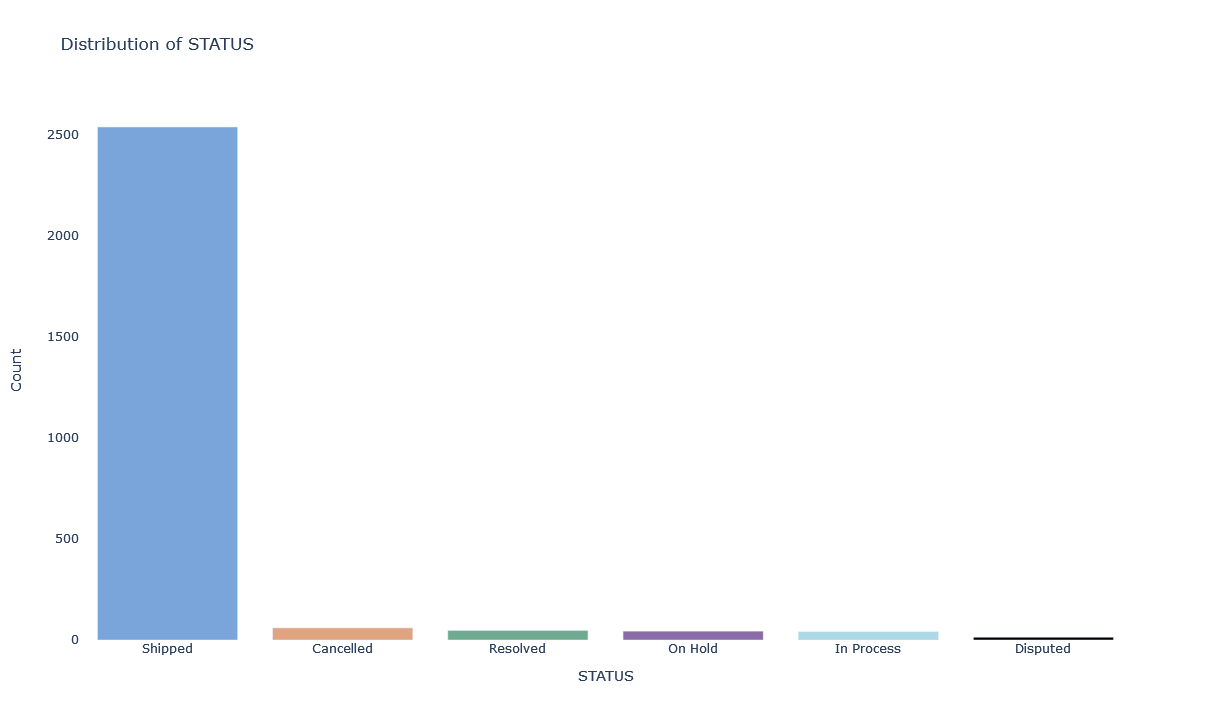

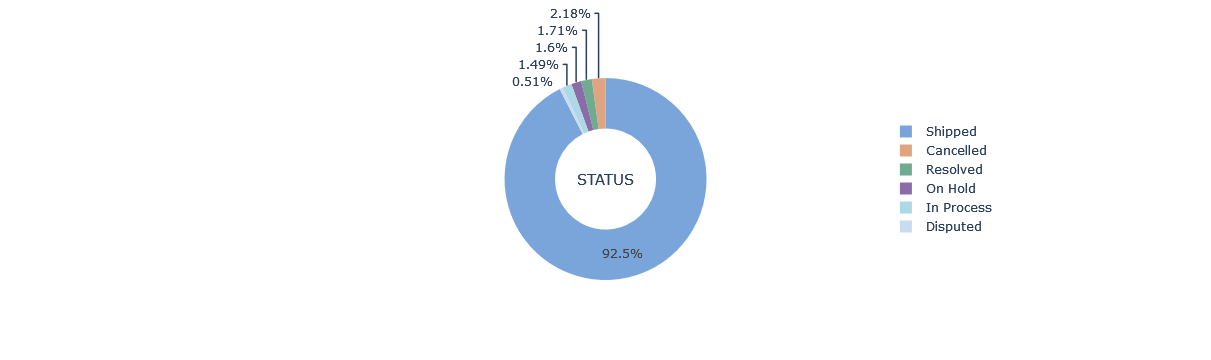

       
Distribution of PRODUCTLINE
____________________________________________________________


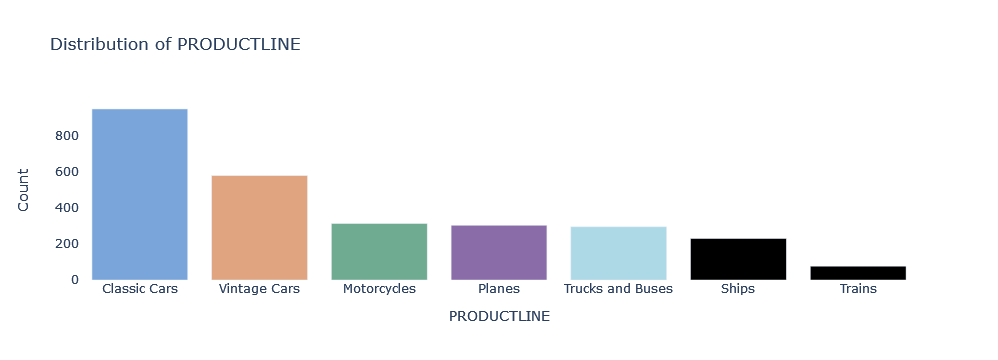

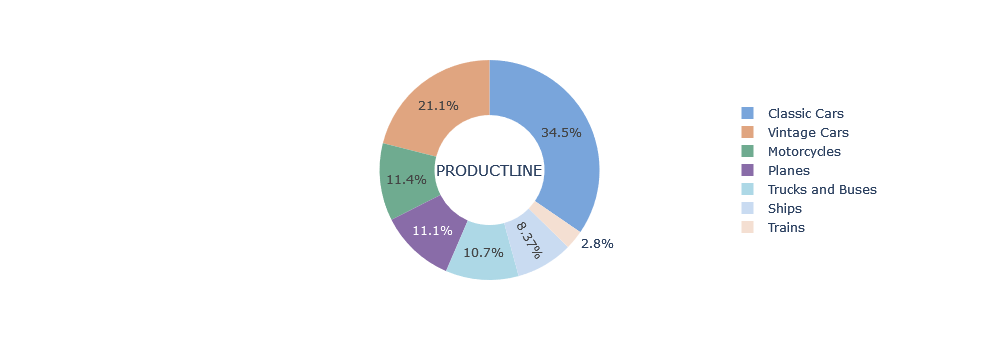

       
Distribution of DEALSIZE
____________________________________________________________


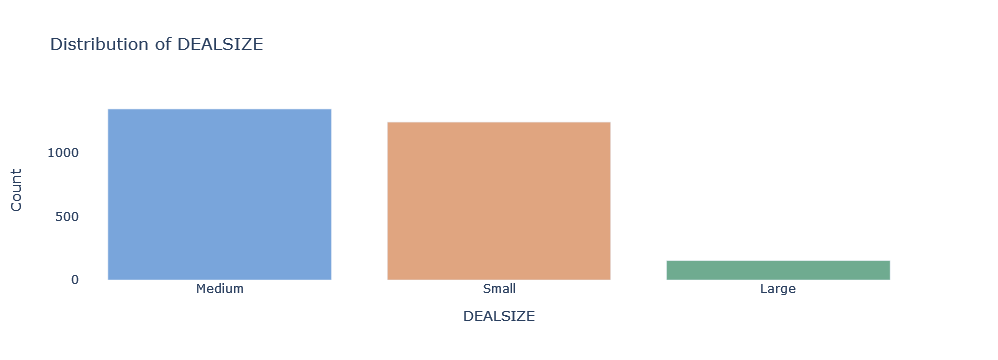

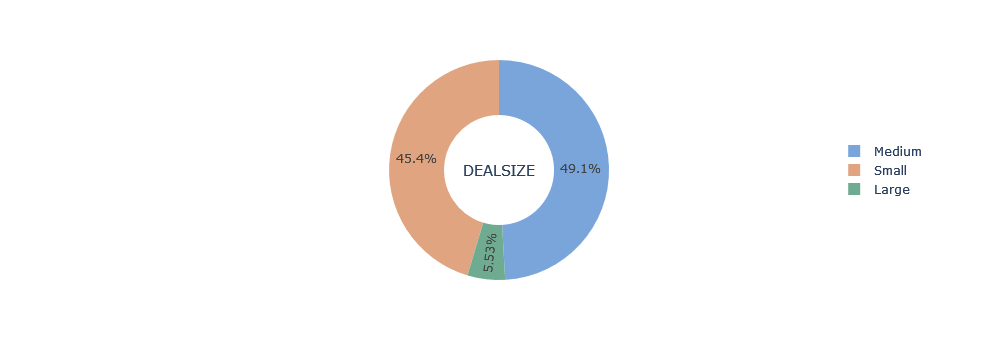

In [215]:
cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_columns:
    univariateAnalysis_category(x)

Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


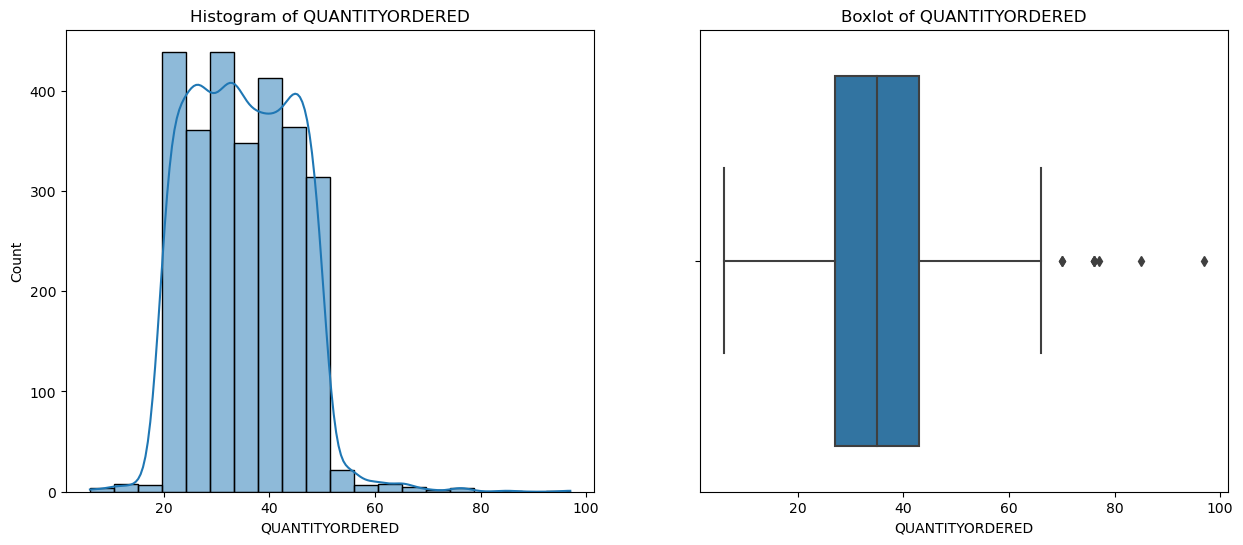

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


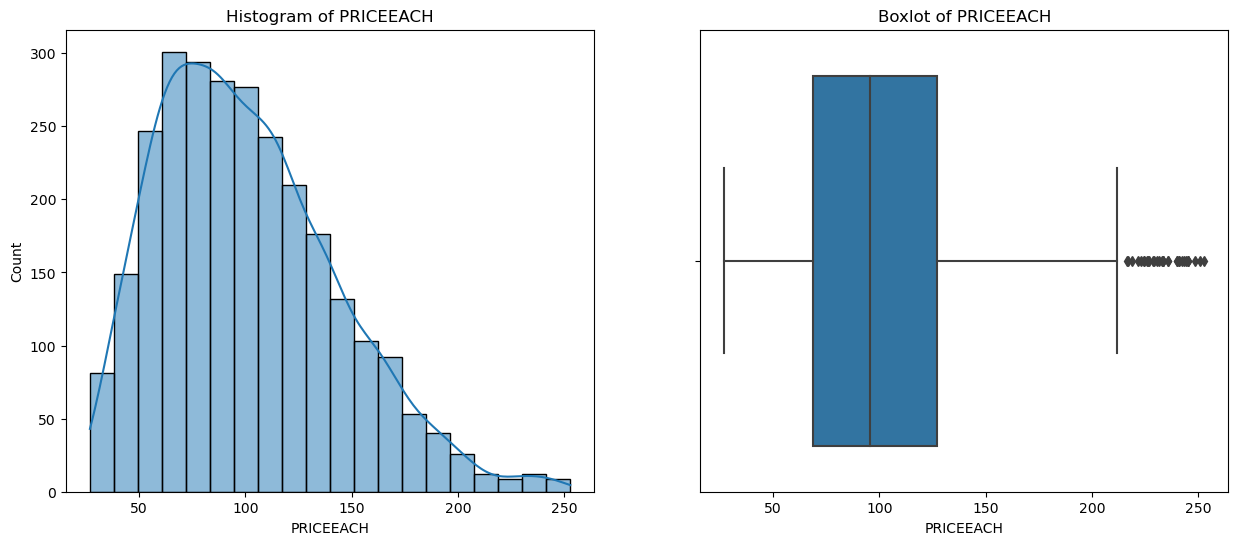

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


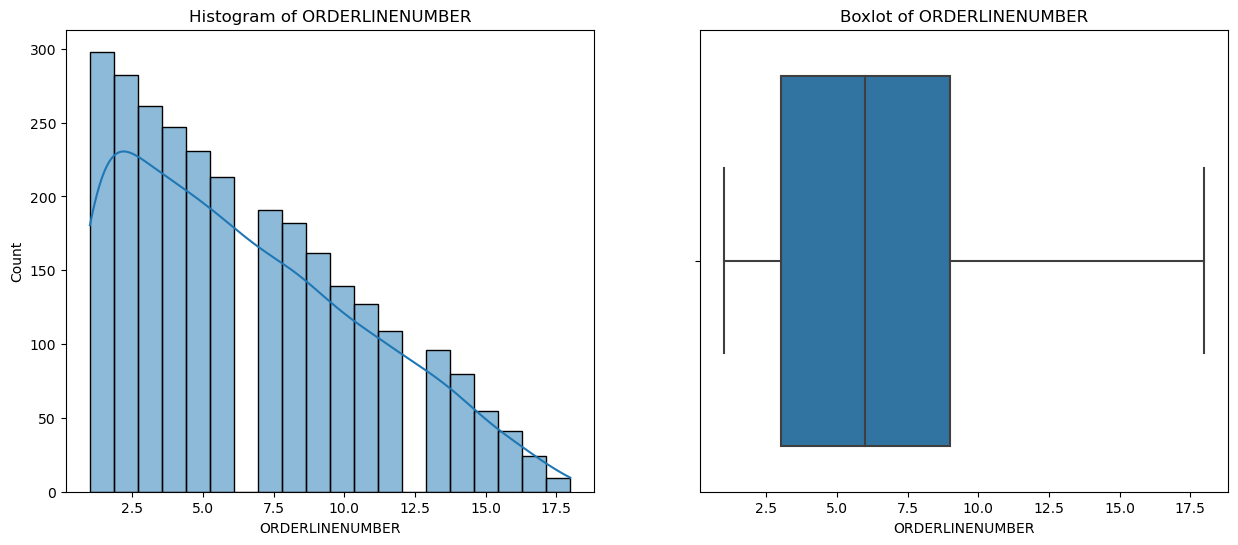

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


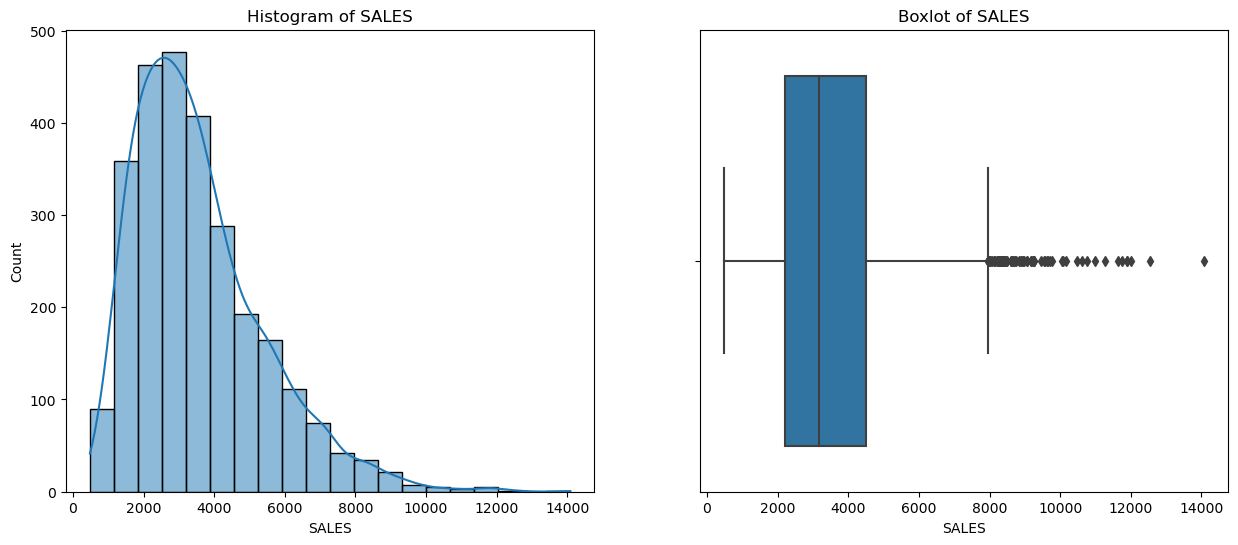

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


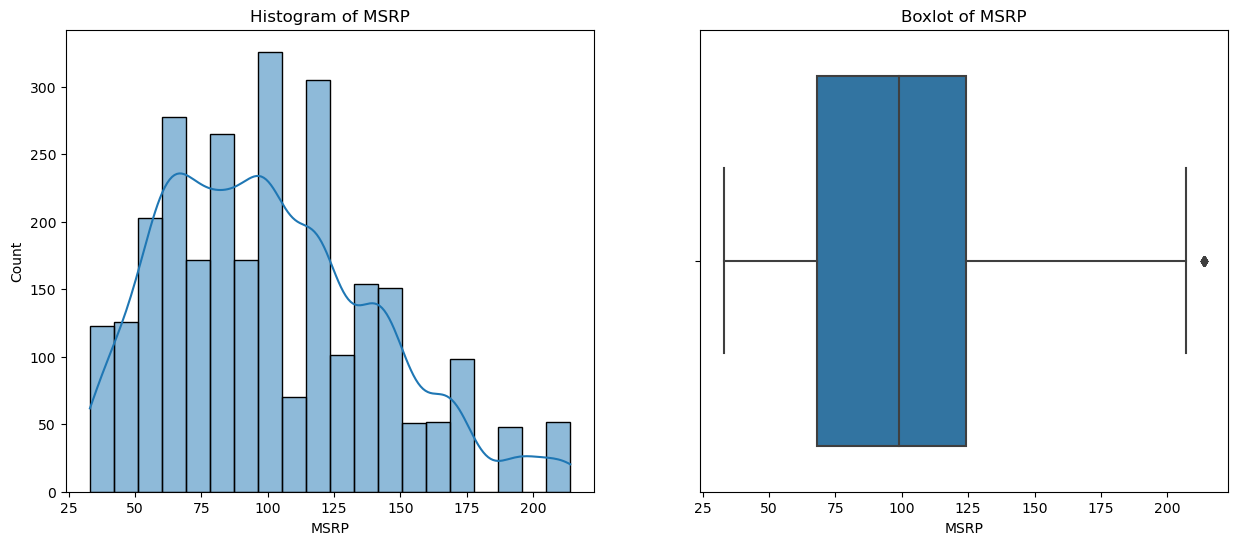

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


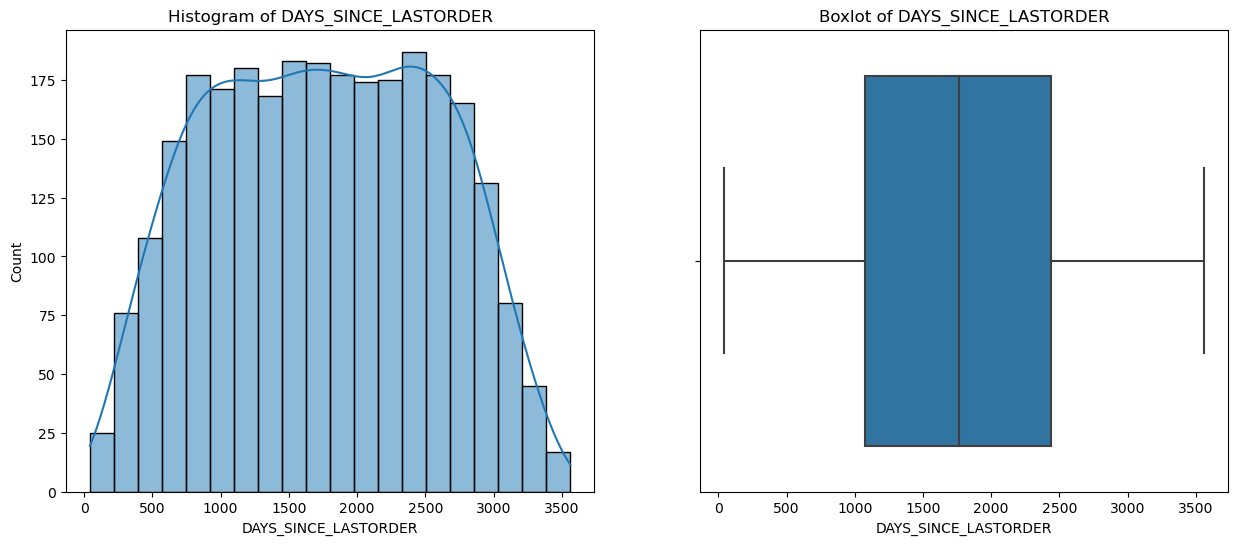

In [217]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)

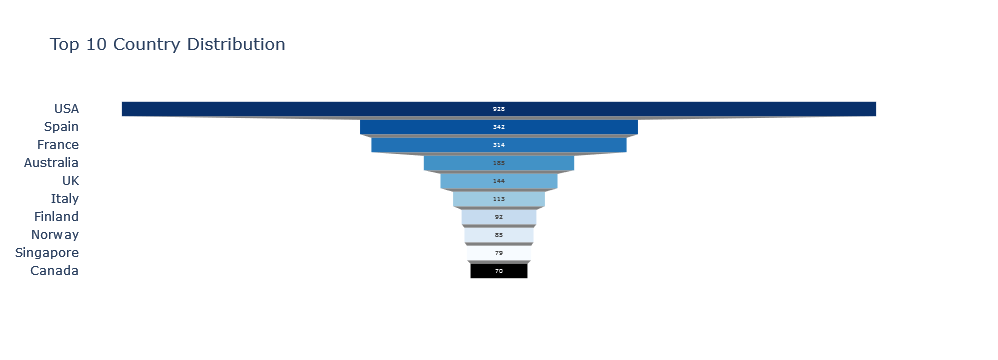

In [219]:
#Top 10 Counteries
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

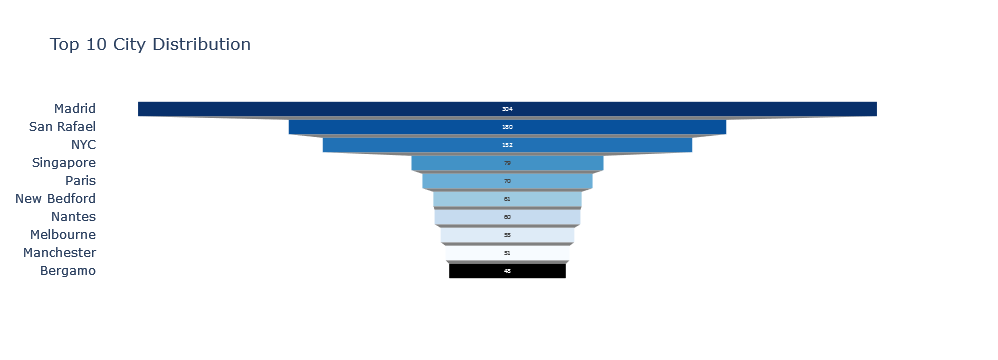

In [221]:
#Top 10 Cities
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

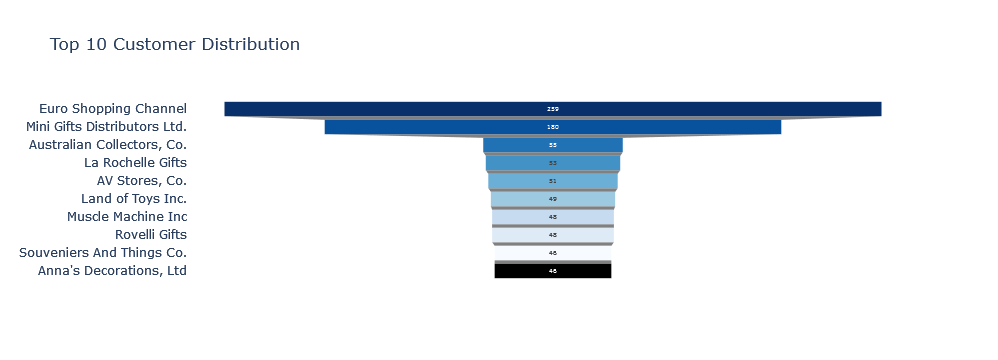

In [223]:
#Top 10 Customer
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

 Bivariate Analysis

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



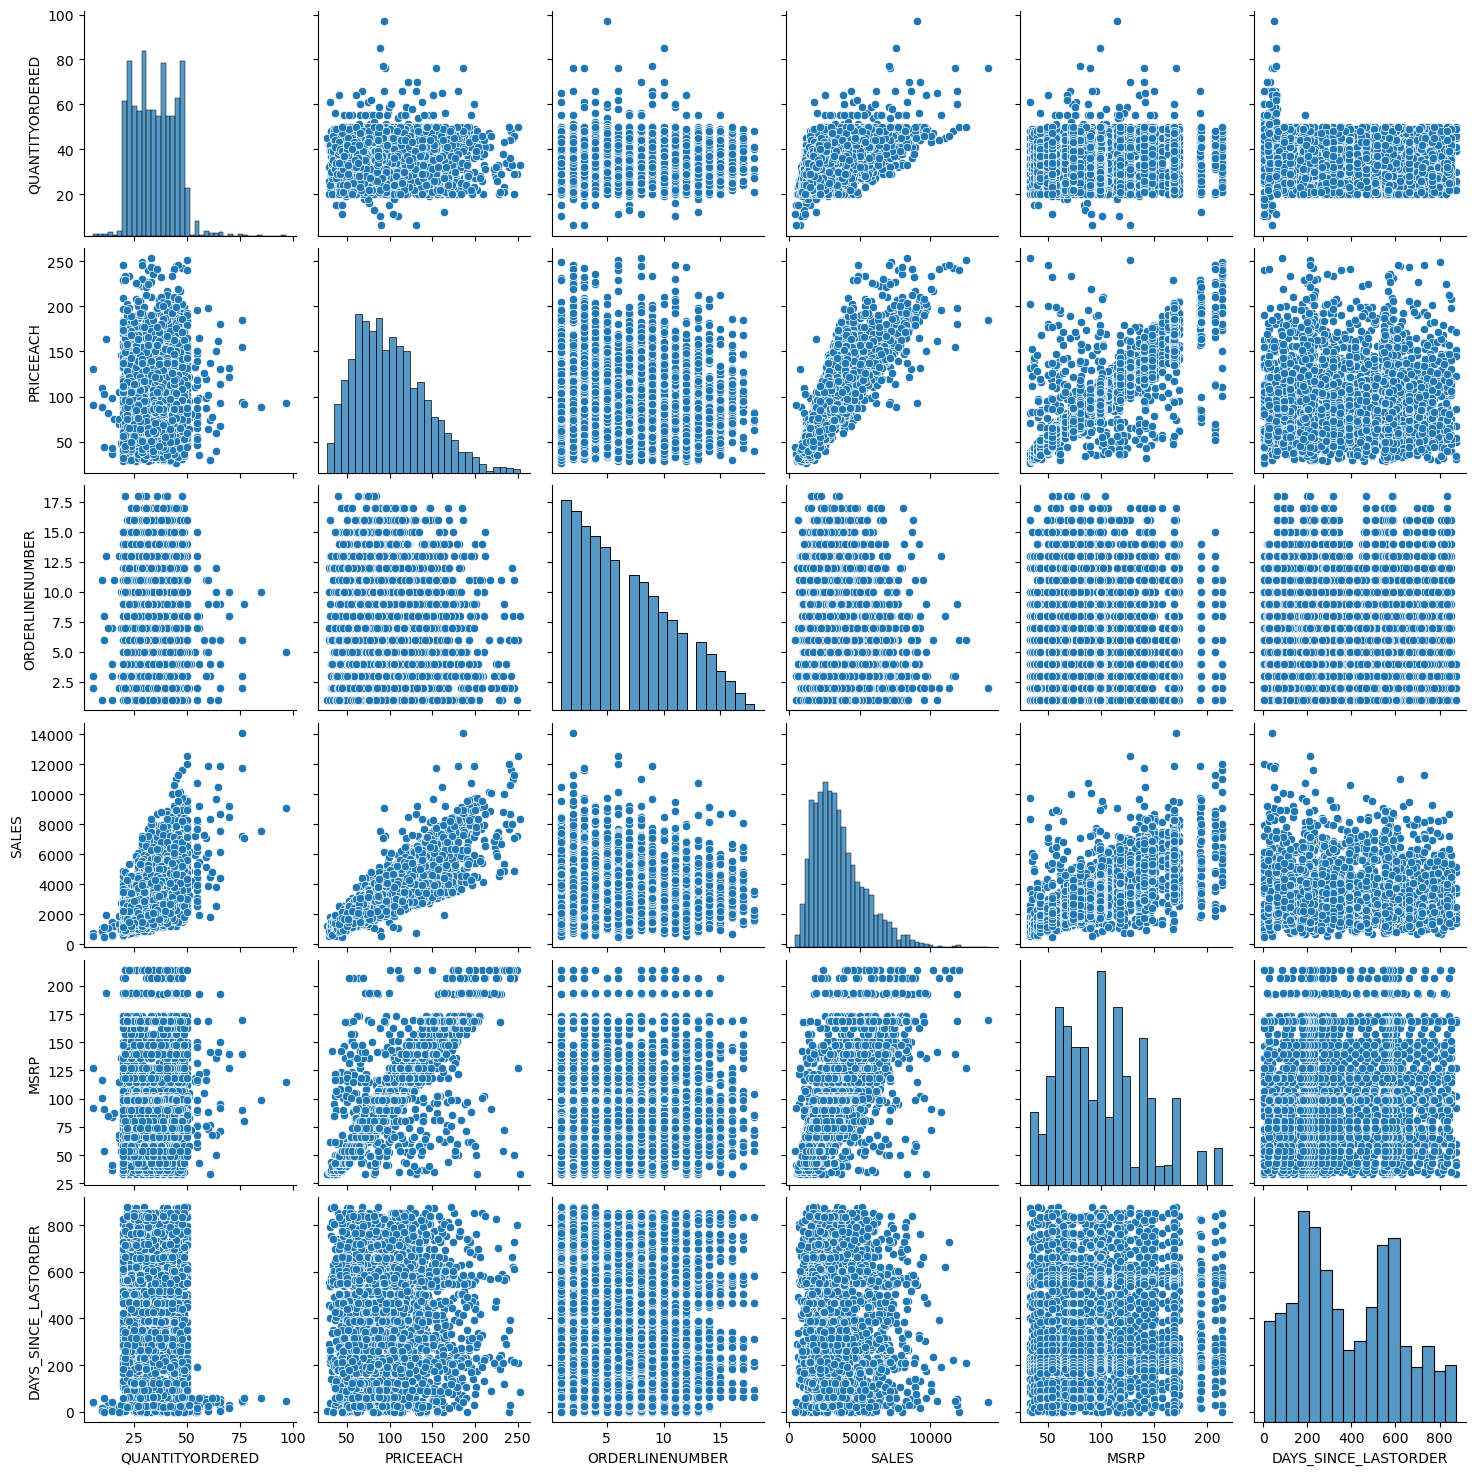

In [229]:
sns.pairplot(data=df_num)

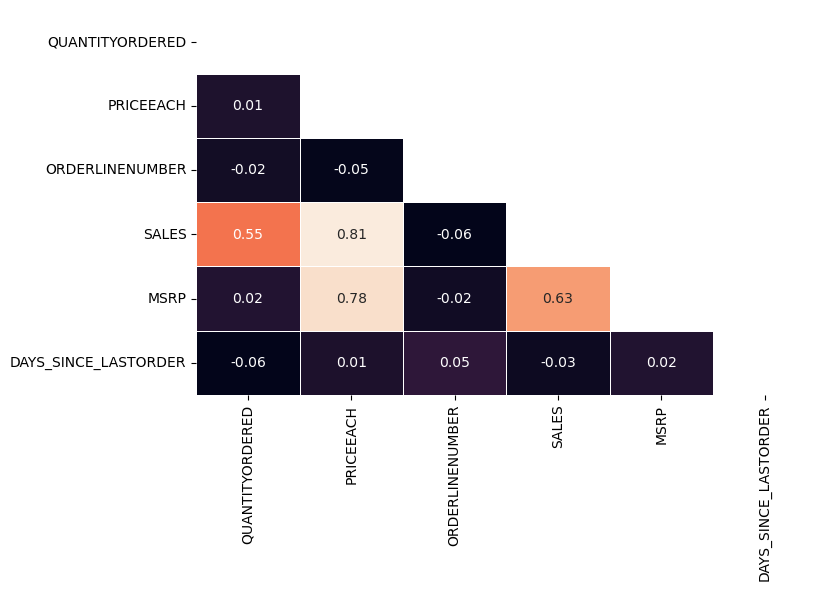

In [231]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

Correlation

1.Quantity Ordered and Sales: When customers order more items (QUANTITYORDERED), it's often associated with higher sales (SALES). So, the more customers buy, the more the company earns in sales.

2.Price and Sales: There's a strong connection between the price of each item (PRICEEACH) and the total sales (SALES). When items are priced higher, the company tends to make more in sales. So, pricing plays a significant role in revenue.

3.MSRP and Price: The price at which items are sold (PRICEEACH) is closely related to the manufacturer's suggested retail price (MSRP). In most cases, the selling price is quite similar to what the manufacturer recommends.

4.Days Since Last Order: The time elapsed since a customer's last order (DAYS_SINCE_LASTORDER) has a weak connection with the quantity of items ordered. Customers who order more frequently may tend to buy smaller quantities, but this relationship isn't very strong.

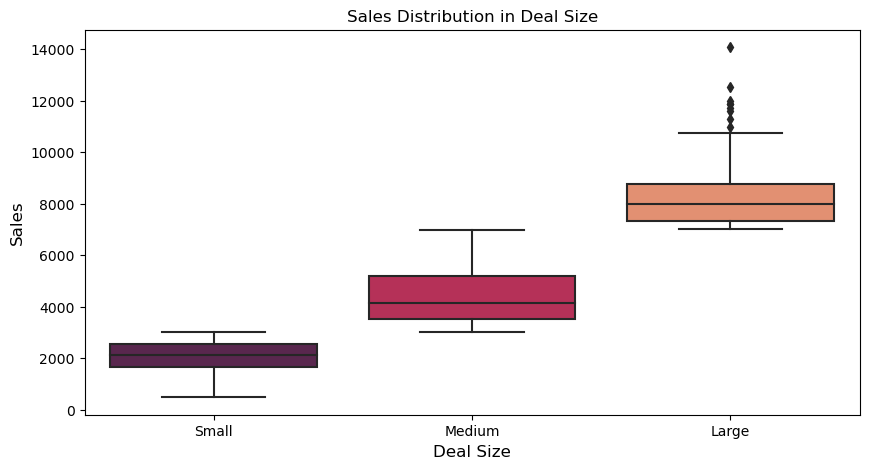

In [233]:
#Sales Distribution in Deal Size 
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

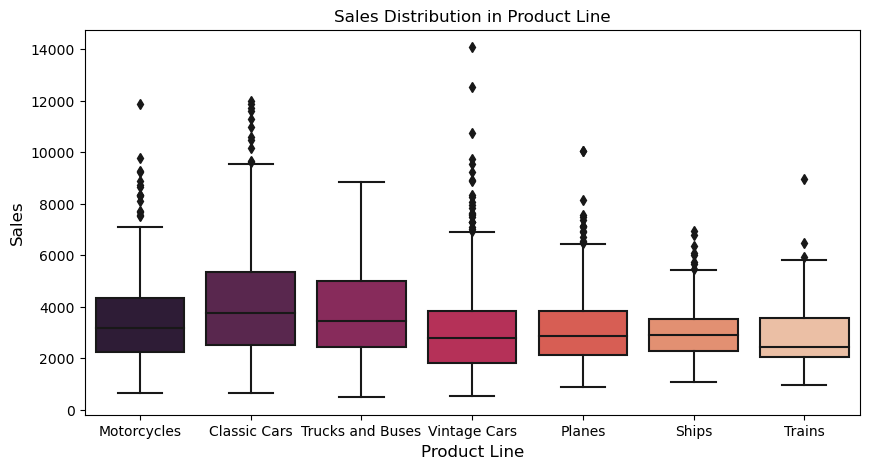

In [239]:
#Sales Distribution in Product Line
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

In [245]:
# Extract year, month, week, and quarter from ORDERDATE
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

/tmp/ipykernel_237/654868742.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



/tmp/ipykernel_237/2304173693.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




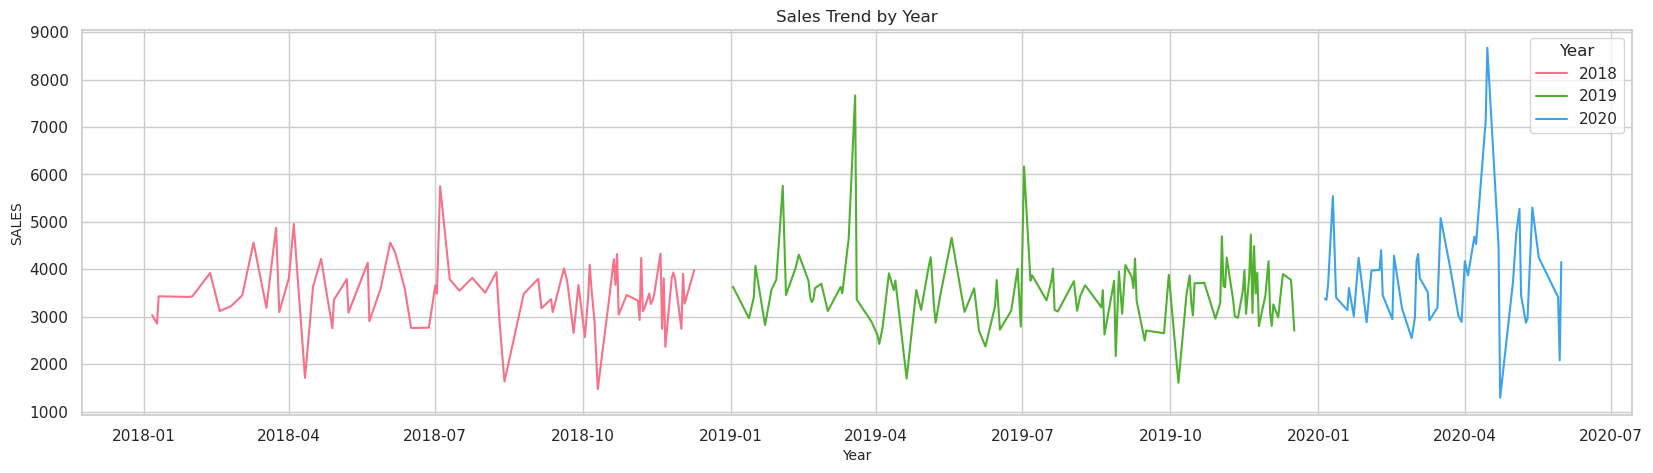

In [247]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

/tmp/ipykernel_237/4007367109.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




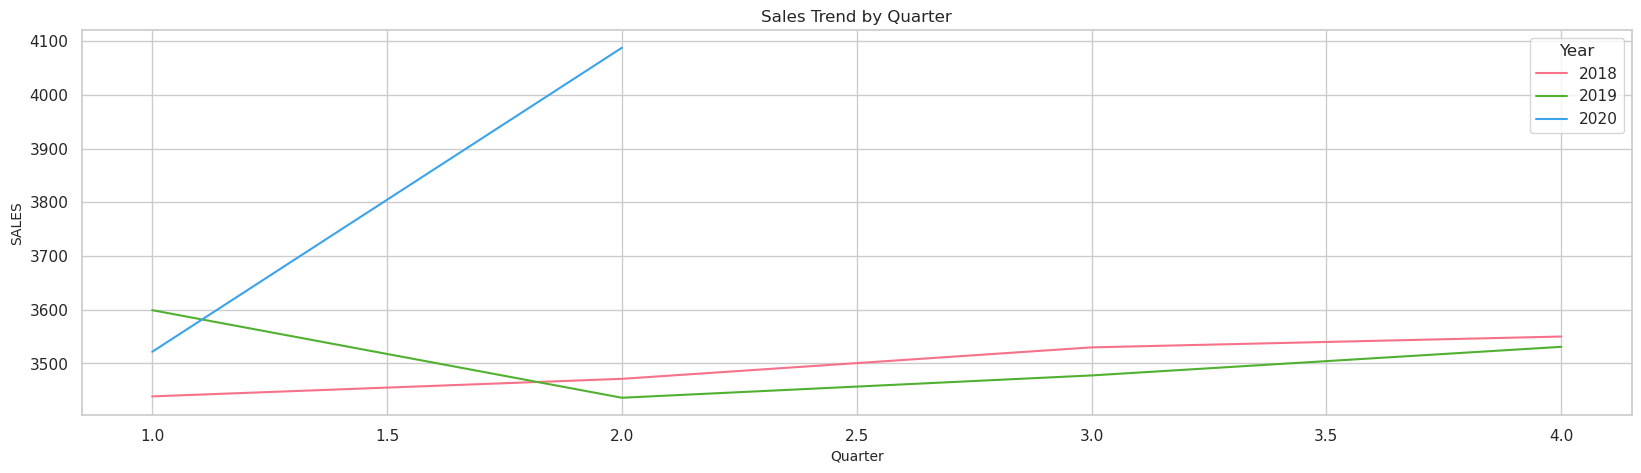

In [249]:
# Sales trend by Quarter
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

/tmp/ipykernel_237/828526908.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




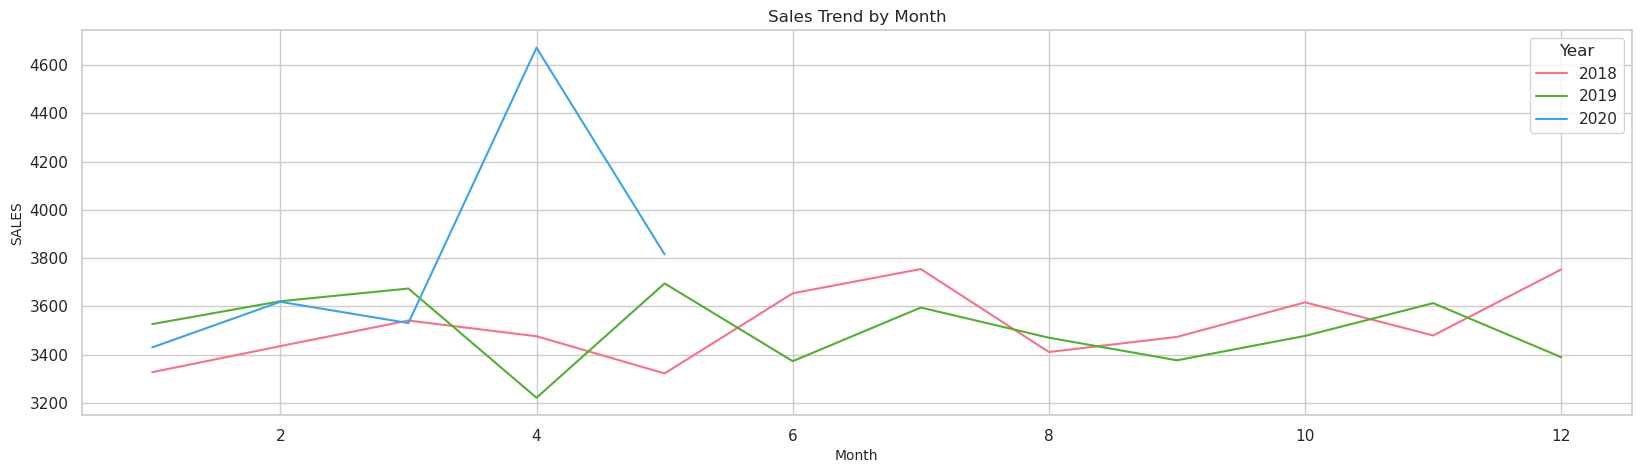

In [251]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

Multivariate Analysis

/tmp/ipykernel_237/320925587.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




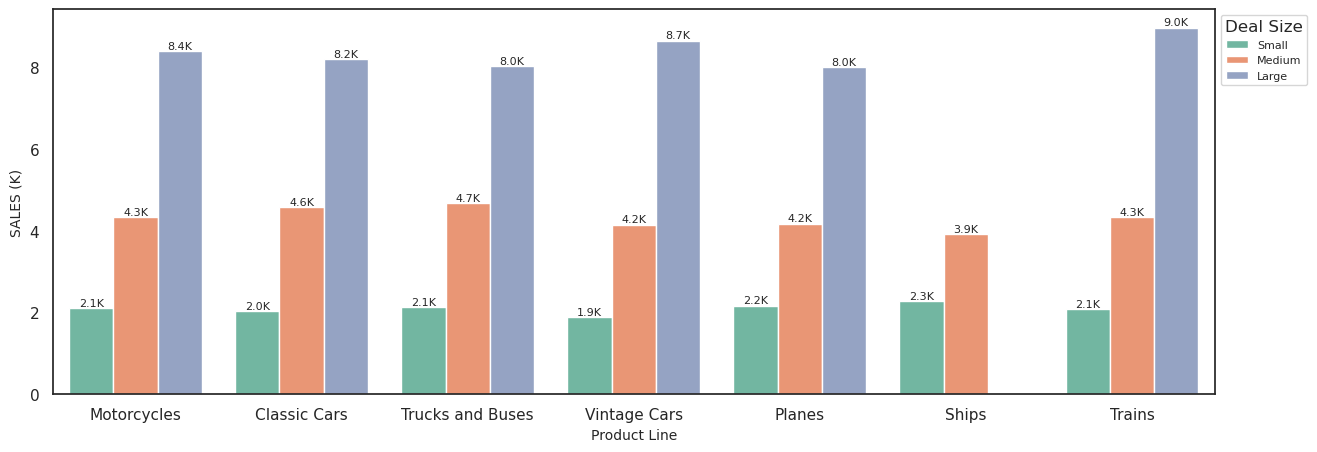

In [253]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_237/3082555607.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




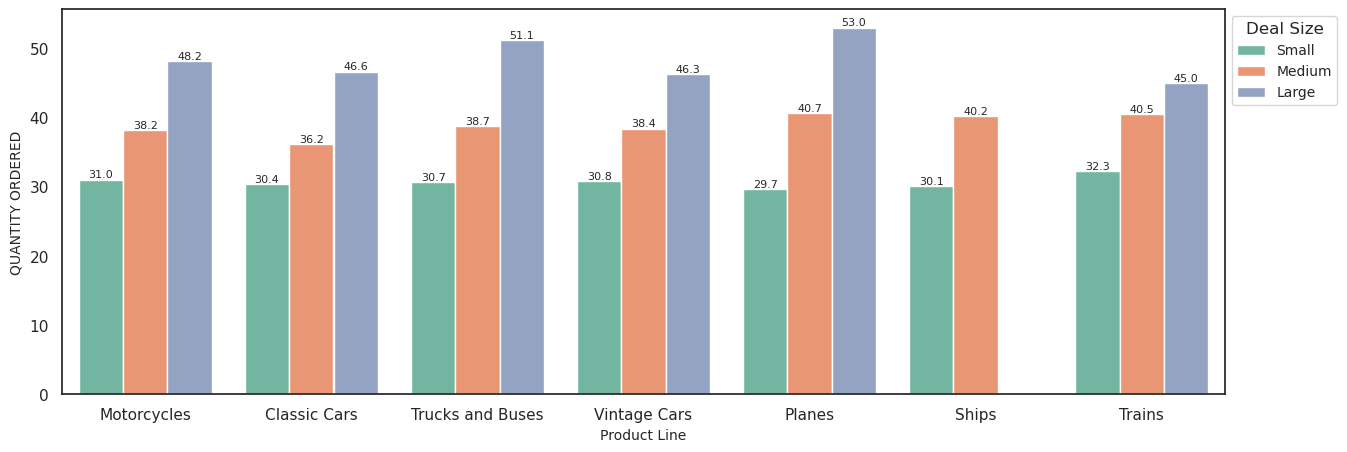

In [255]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_237/3531347485.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




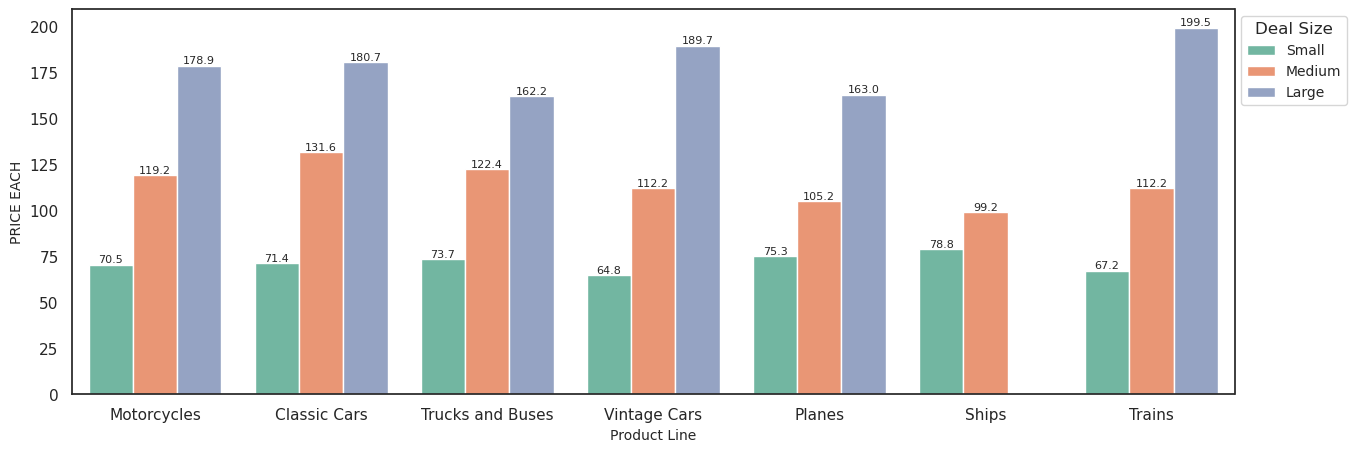

In [257]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_237/3696145666.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




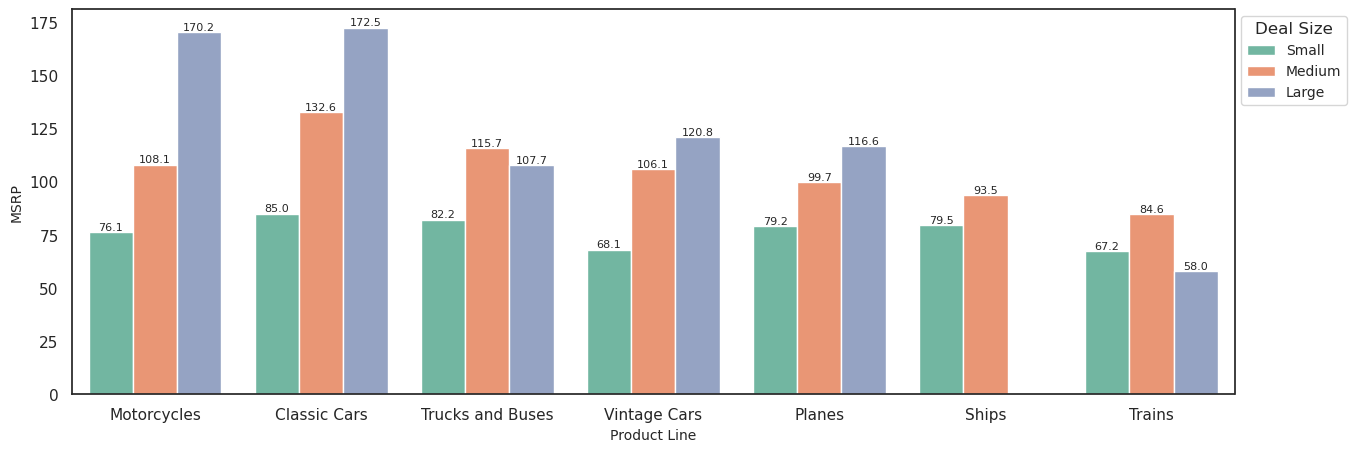

In [259]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_237/2609093939.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




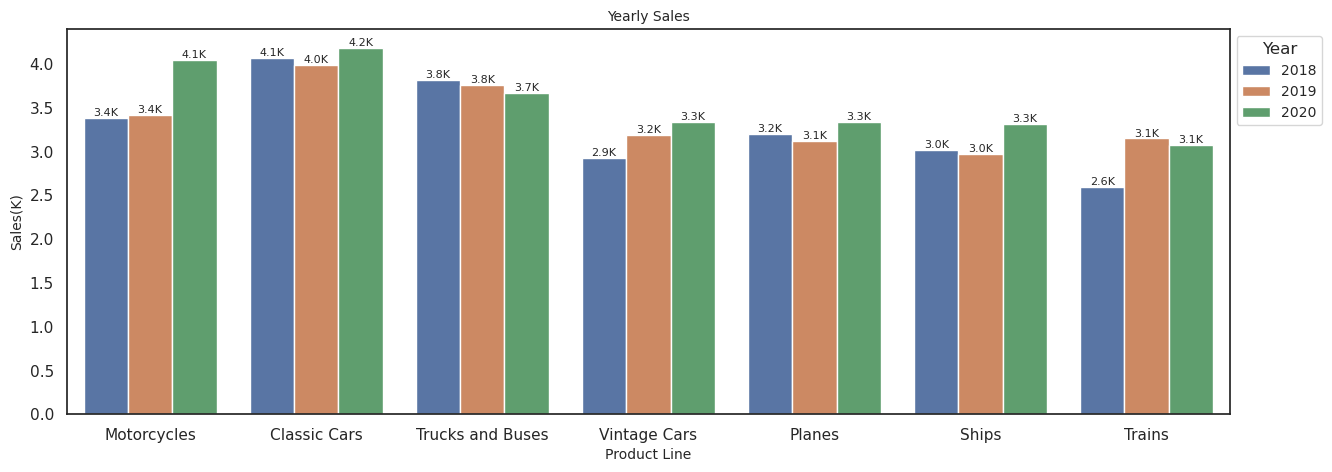

In [261]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_237/1092095451.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




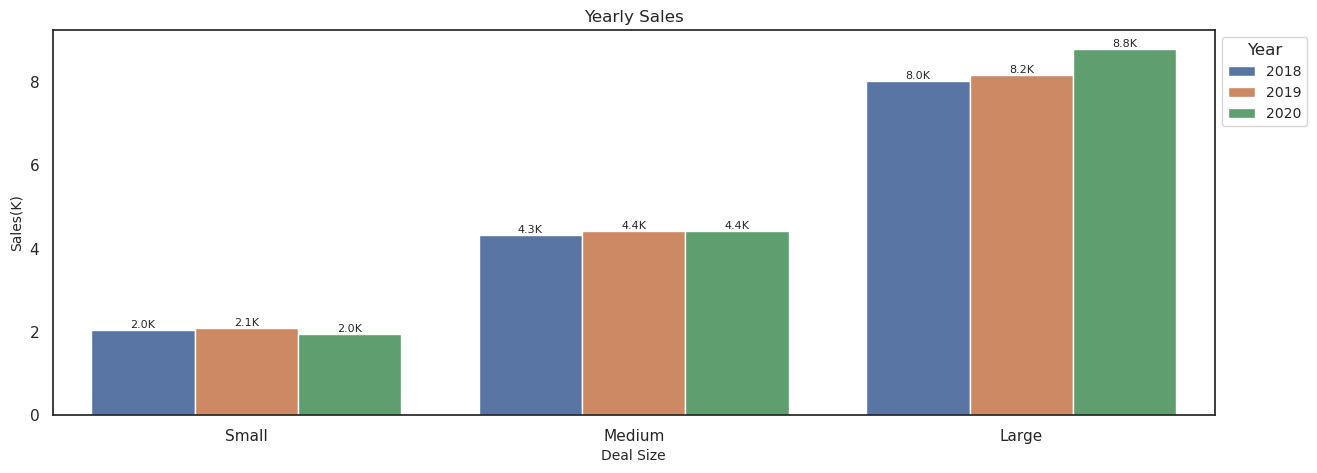

In [263]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_237/2448952617.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_237/2448952617.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




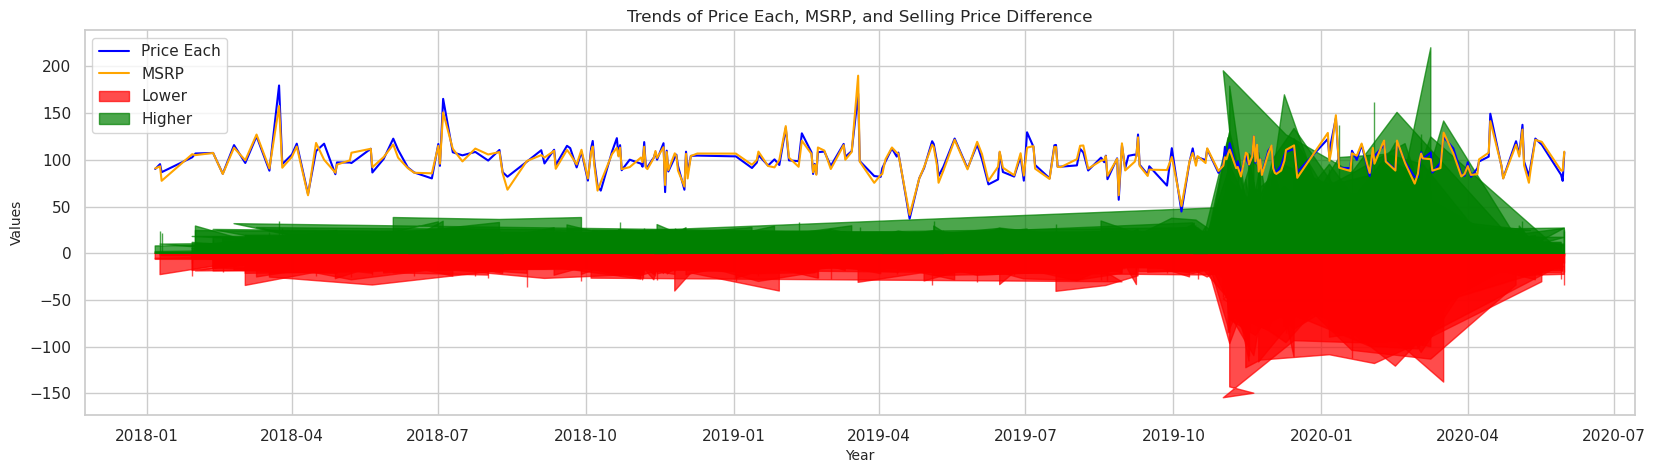

In [265]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

Key Insights from Analysis
=?(Sales overview):

1.298 orders placed by 89 customers from 19 countries in the lst 2.5 yers.
2.United States leads in sales, followed by Spain and France. Notable sales from Australia and Singapore in the Eastern Hemisphere.
3.Among cities, Madrid tops sales, with San Diego and New York City following.
4.In the Eastern Hemisphere, sales from Australia and Singapore declined, while customers from Japan were added in 2019.
5.Significant sales increase observed in US and France in 2019.


=>(Products and Revenue):

1.The company manufactures 109 automobile parts under 7 product lines with prices ranging from 26 to 252.
2.Classic Car parts generate the maximum revenue through sales (approx. 40%).
3.Car, Truck, Bus, and Motorcycle parts account for 80% of the company's revenue.

=>(Sales Trends):
1.Upward sales trend with monthly seasonality. Peak sales in October and November annually.
2.Higher sales and customer activity in the early months of 2020 compared to previous years.

=>Concern

1.No new customers added since September 2019.

=>Transaction Characteristics:

1.Most deals are of medium and small size, with transactions typically containing 20 to 50 items.

2.Key Customers:

1.Euro Shopping Channel and Mini Gifts Distribution Ltd. are best customers (highest spending, most frequent, and recent).

=>Customer Retention:

1.A good customer retention rate of approximately 90% was observed in 2019.


